In [1]:
import pandas as pd
data = pd.read_excel('NOx_with_AR.xlsx')

data.head()

,Unnamed: 0,roz_aval,roz_dovom,roz_sevom,roz_4,Tempreture,Humid,Wind Speed,Wind Direction Sin,Wind Direction COS,Pressure,RainFall,roz_pihbini
0,0,10.434783,14.041667,12.541667,12.541667,18.9,70.125,1.875,-0.500,0.866025,1007.70,1.0,12.916667
1,1,14.041667,12.541667,9.958333,9.958333,20.0,60.750,1.125,-0.866,0.500000,1012.65,0.0,20.000000
2,2,12.541667,9.958333,12.916667,12.916667,20.8,52.875,1.000,-0.342,0.939693,1014.34,0.0,24.000000
3,3,9.958333,12.916667,20.000000,20.000000,21.3,47.500,1.125,-0.500,-0.866025,1013.30,0.0,21.291667
4,4,12.916667,20.000000,24.000000,24.000000,23.2,48.125,0.875,0.866,0.500000,1012.22,0.0,20.416667


In [23]:
X = data[['roz_aval','roz_dovom','roz_sevom','roz_4','Tempreture','Humid','Wind Direction Sin','Wind Direction COS','Pressure','RainFall']]
X = X.values
Y = data['roz_pihbini']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=0 ,test_size=0.2)

In [29]:
import keras
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(18, activation='relu', input_dim=10))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=2000,batch_size=len(x_train), verbose=0)
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 146.5063


146.50631713867188

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
y_new_inverse3 = model.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse3)
mae33 = mean_absolute_error(y_test, y_new_inverse3)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 146.506
rmse : 12.104
mae : 7.747


(0, 90)

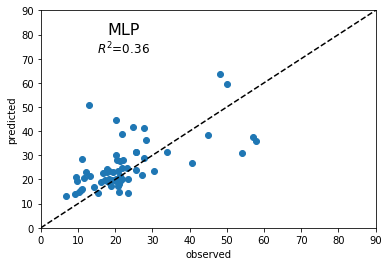

In [31]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse3)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(18,80,'MLP',fontsize=16)
plt.text(15,72, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse3)),fontsize=12)
plt.xlim([0, 90])
plt.ylim([0, 90])

In [32]:
model_json1 = model.to_json()
with open("MLP_NOx_with_AR_1.json", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
model.save_weights("MLP_NOx_with_AR_1.h5")
print("Saved model to disk")

Saved model to disk


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
regressor10 = RandomForestRegressor(n_estimators=64, random_state=0)
regressor10.fit(x_train, y_train)
y_new_inverse30 = regressor10.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse30)
mae33 = mean_absolute_error(y_test, y_new_inverse30)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 178.123
rmse : 13.346
mae : 8.016


(0, 90)

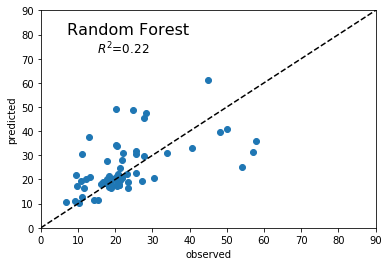

In [43]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse30)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(7,80,'Random Forest',fontsize=16)
plt.text(15,72, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse30)),fontsize=12)
plt.xlim([0, 90])
plt.ylim([0, 90])